## Importações e configurações iniciais

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importando bibliotecas de machine learning
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler

from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

In [7]:
# Leitura de dados com pandas
df = pd.read_csv("/Users/leticiapires/Desktop/HousePrediction/downloads/kc_house_data.csv")

# Visualizando as primeiras 5 linhas do dataset
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,NaN,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,NaN,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,NaN,98074,47.6168,-122.045,1800,7503


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  object 
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   914 non-null    float64
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

## Análise exploratória de dados


### Analisando as variáveis

In [9]:
# Retorna o número de linhas e colunas
df.shape

(21613, 21)

Podemos ver que esse conjunto de dados contém 21.613 linhas e 21 colunas.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  object 
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   914 non-null    float64
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Através do `.info` podemos entender quais os tipos dos nossos dados, quais colunas temos e se temos valores nulos.

Podemos usar o pandas para obter estatísticas resumidas de nossos dados. O método `.describe` nos dará também o número de valores

In [11]:
# Visão geral das estatisticas descritivas para as variáveis numéricas.
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,914.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,7.656873,1788.390691,291.509045,1971.005136,1995.827133,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,1.175459,828.090978,442.575043,29.373411,15.517107,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,290.000000,0.000000,1900.000000,1934.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,7.000000,1190.000000,0.000000,1951.000000,1987.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,7.000000,1560.000000,0.000000,1975.000000,2000.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,8.000000,2210.000000,560.000000,1997.000000,2007.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000




***Vamos analisar*:**


**1. Coluna `price` (Preço)**
- Média (mean): indica que em média os preços de casas estão em torno de ~540.088 USD.
- Desvio padrão (std): ~367.127 USD, mostra uma grande variação nos preços das casas, sugerindo que pode haver casas de luxo e casas mais acessíveis no mesmo dataset.
- Mínimo e Máximo: o preço varia de 75.000 até 7.700.000 USD, reforçando a diversidade de tipos de propriedades no dataset.
*O alto desvio padrão e a grande diferença entre os valores mínimo e máximo **sugerem a presença de outliers**. Considerar investigação no futuro.

**2. Colunas `bedrooms` e `bathrooms` (Quartos e Banheiros)**
- Mínimo: Ambas têm valores mínimos de 0, o que pode ser um problema. Um valor de 0 para bathrooms não faz sentido para uma casa, indicando que há dados anômalos ou casas não residenciais.
- Máximo: bedrooms vai até 33, um número extremamente alto para uma casa típica, sugerindo um possível outlier ou erro de entrada de dados.
* Para valores 0, você pode considerar analisar se são dados válidos.

**3. Colunas `sqft_living` e `sqft_lot` (Área em Pés Quadrados)**
- Média (mean): A média da área habitável (sqft_living) é 2.079 pés², e a média da área do lote (sqft_lot) é 15.106 pés².
- Desvio Padrão (std): Ambos apresentam alta variação, especialmente sqft_lot, sugerindo uma grande diversidade no tamanho das propriedades.
- Mínimo e Máximo: O sqft_living varia de 290 até 13.540 pés². Já o sqft_lot tem um intervalo muito amplo, de 520 até 1.651.359 pés². Isso indica a presença de propriedades com tamanhos de lotes fora do padrão, como possivelmente grandes fazendas ou terrenos.

**4. Colunas `floors`, `waterfront`, e `view`**
- Floors: Varia de 1 a 3,5, sugerindo casas com múltiplos andares. A média é 1,5, indicando que a maioria das casas tem um ou dois andares.
- Waterfront: A média de 0,0075 mostra que poucas casas estão próximas a água. A maior parte dos valores é provavelmente 0.
- View: A média e o desvio padrão sugerem que a maioria das casas não tem uma vista de alta qualidade.

**5. Colunas `grade` e `condition` (Qualidade e Condição)**
- Grade: Varia de 1 a 13, com uma média de 7,7. Isso sugere que a maioria das casas tem uma qualidade média a acima da média.
- Condition: Varia de 1 a 5, com uma média de 3,4, indicando que a condição geral das casas é razoavelmente boa.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  object 
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   914 non-null    float64
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Com `.info` conseguimos extrair mais informações dos dados, quantos nulos, os tipos e colunas disponíveis no dataset.

### Verificando valores nulos

In [13]:
# Passo 1: Contar valores nulos em cada coluna
total_nulos = df.isnull().sum()

# Passo 2: Calcular a porcentagem de valores nulos
percentual_nulos = (total_nulos / len(df)) * 100

# Passo 3: Criar um DataFrame com os resultados
dados_nulos = pd.DataFrame({'Total': total_nulos, 'Percentual': percentual_nulos})

# Passo 4: Ordenar pelos maiores percentuais
dados_nulos = dados_nulos.sort_values(by='Total', ascending=False)

# Exibir as primeiras 20 colunas com valores nulos
dados_nulos.head(20)


,Total,Percentual
yr_renovated,20699,95.771064
id,0,0.000000
grade,0,0.000000
sqft_living15,0,0.000000
long,0,0.000000
lat,0,0.000000
zipcode,0,0.000000
yr_built,0,0.000000
sqft_basement,0,0.000000
sqft_above,0,0.000000


### Analisando variáveis categóricas

Verificar a cardinalidade de uma coluna categórica significa contar o número de valores únicos (distintos) presentes nessa coluna.

Por que a cardinalidade é importante?
- Análise Exploratória: Durante a análise exploratória, verificar a cardinalidade ajuda a entender a diversidade dos dados em uma coluna categórica. Por exemplo, se uma coluna "Cidade" tiver alta cardinalidade (muitas cidades diferentes), ela pode ser tratada de forma diferente em análises e modelos.

- Modelagem: Em modelos de machine learning, colunas categóricas com alta cardinalidade (muitos valores únicos) podem criar desafios. Saber a cardinalidade ajuda a decidir a melhor forma de tratar essas colunas.

In [14]:
# Para a coluna de condition, quantas categorias diferentes podemos ter?
df.condition.value_counts()

,count
condition,
Média,14031
Boa,5679
Excelente,1701
Regular,172
Ruim,30


<ipython-input-15-55630cc6563b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='condition', palette='viridis')


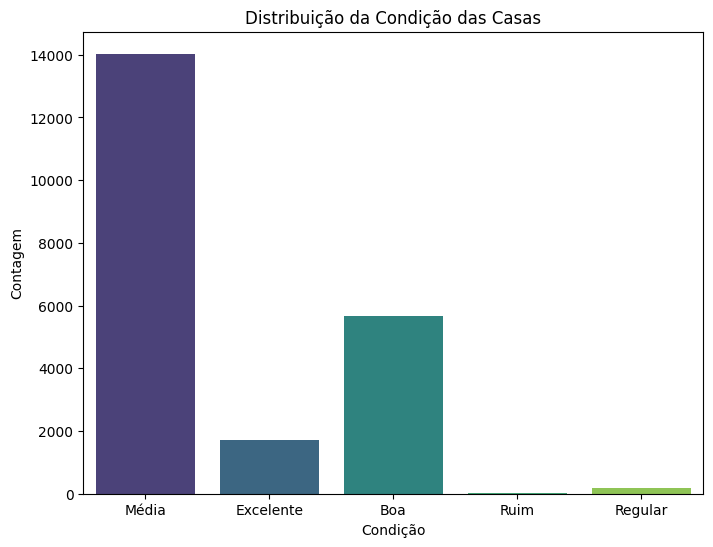

In [15]:
# Plotando um gráfico de barras para a variável categórica 'condition'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='condition', palette='viridis')
plt.title('Distribuição da Condição das Casas')
plt.xlabel('Condição')
plt.ylabel('Contagem')
plt.show()

## Limpeza e transformação dos dados

### Ajustar tipos das colunas

Entendendo sobre tipos de variáveis:

- **Variáveis categóricas:** representam grupos ou categorias e não têm um valor numérico natural associado.
 - Nominais: Variáveis categóricas que representam categorias sem ordem ou hierarquia. Os valores são apenas rótulos. Ex: sexo (M, F), cores.
 - Ordinais:  representam categorias com uma ordem ou hierarquia natural. Ex: nível de satisfação.

- **Variáveis numéricas**: expressam uma quantidade e podem ser medidas ou contadas.
 - Discretas: assumem valores inteiros e contáveis. Ex: quantidade de produtos vendidos.
 - Contínuas: podem assumir qualquer valor dentro de um intervalo, incluindo frações e decimais. Ex: altura, peso.


De acordo com isso, podemos assumir algumas mudanças nos tipos das nossas variáveis:


- **Variáveis de Identificação:** `id`
- **Variáveis Temporais:** `date`
- **Numéricas Contínuas:** `price`, `sqft_living`, `sqft_lot`, `sqft_above`, `sqft_basement`, `lat`, `long`, `sqft_living15`, `sqft_lot15`, `bathrooms`, `floors`.
- **Numéricas Discretas**: `bedrooms`,  `yr_built`, `yr_renovated`
- **Categóricas Nominais:** `waterfront`, `zipcode`
- **Categóricas Ordinais:** `view`, `condition`, `grade`

In [16]:
# Converter para variáveis numéricas
num_continuas = ['sqft_living', 'sqft_lot', 'sqft_above',
                 'sqft_basement', 'sqft_living15', 'sqft_lot15']
df[num_continuas] = df[num_continuas].astype(float)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  float64
 6   sqft_lot       21613 non-null  float64
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  object 
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  float64
 13  sqft_basement  21613 non-null  float64
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   914 non-null    float64
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [18]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180.0,5650.0,1.0,0,0,...,7,1180.0,0.0,1955,NaN,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3,2.25,2570.0,7242.0,2.0,0,0,...,7,2170.0,400.0,1951,1991.0,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2,1.00,770.0,10000.0,1.0,0,0,...,6,770.0,0.0,1933,NaN,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4,3.00,1960.0,5000.0,1.0,0,0,...,7,1050.0,910.0,1965,NaN,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3,2.00,1680.0,8080.0,1.0,0,0,...,8,1680.0,0.0,1987,NaN,98074,47.6168,-122.045,1800.0,7503.0


In [19]:
# #Converter para variáveis numéricas discretas
# num_discretas = ['yr_built', 'yr_renovated']
# df[num_discretas] = df[num_discretas].astype(int)

# # Acusa erro, porque como verificamos temos valores nulos
# # Vamos ver isso depois

In [20]:
#Converter para variáveis categóricas
categoricas = ['waterfront', 'view', 'grade', 'zipcode']
df[categoricas] = df[categoricas].astype('object')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  float64
 6   sqft_lot       21613 non-null  float64
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  object 
 9   view           21613 non-null  object 
 10  condition      21613 non-null  object 
 11  grade          21613 non-null  object 
 12  sqft_above     21613 non-null  float64
 13  sqft_basement  21613 non-null  float64
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   914 non-null    float64
 16  zipcode        21613 non-null  object 
 17  lat            21613 non-null  float64
 18  long  

In [22]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180.0,5650.0,1.0,0,0,...,7,1180.0,0.0,1955,NaN,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3,2.25,2570.0,7242.0,2.0,0,0,...,7,2170.0,400.0,1951,1991.0,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2,1.00,770.0,10000.0,1.0,0,0,...,6,770.0,0.0,1933,NaN,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4,3.00,1960.0,5000.0,1.0,0,0,...,7,1050.0,910.0,1965,NaN,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3,2.00,1680.0,8080.0,1.0,0,0,...,8,1680.0,0.0,1987,NaN,98074,47.6168,-122.045,1800.0,7503.0


### Valores duplicados

In [23]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  float64
 6   sqft_lot       21613 non-null  float64
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  object 
 9   view           21613 non-null  object 
 10  condition      21613 non-null  object 
 11  grade          21613 non-null  object 
 12  sqft_above     21613 non-null  float64
 13  sqft_basement  21613 non-null  float64
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   914 non-null    float64
 16  zipcode        21613 non-null  object 
 17  lat            21613 non-null  float64
 18  long  

### Tratando valores nulos

Tratar valores nulos é uma etapa que deve ser feita com cuidado.

- **Remover valores nulos nem sempre é a melhor opção**. É fundamental entender a origem desses valores e o contexto do conjunto de dados antes de tomar qualquer decisão.
- **Cuidado**: Remover muitas linhas com valores nulos pode resultar na perda de informações importantes e prejudicar suas análises.

- Investigue por que o valor está ausente. Dependendo da situação, você pode decidir entre:
    - **Excluir**: Remover completamente as linhas com valores nulos (somente se os nulos não carregam nenhuma informação relevante).
    - **Preencher**: Substituir os valores nulos por uma média, mediana, ou valor mais apropriado (imputação).

- Se o objetivo final for construir um modelo de Machine Learning, trate os nulos com muita atenção:
    - **Remova nulos** apenas se:
        - O valor ausente realmente não tem significado algum.
        - Sua remoção não afetará a qualidade dos dados restantes.

No caso da coluna `yr_renovated`, onde o valor nulo significa que a casa não foi renovada, é mais apropriado tratar esses nulos de uma forma que represente essa informação.

Então podemos começar preenchendo os valores nulos com 0, indicando que não houve renovação.

In [24]:
# Preenchendo os valores nulos da coluna 'yr_renovated' com 0
df['yr_renovated'].fillna(0, inplace=True)

<ipython-input-24-a0fba3838f6c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['yr_renovated'].fillna(0, inplace=True)


### Criando novas colunas?

Sugestão: Criar uma nova coluna booleana que indica se a casa foi renovada ou não (a partir da coluna `yr_renovated`). Isso porque a informação de renovação é relevante e pode ser útil para análises e modelagens futuras.

In [25]:
# Definir uma função normal com if
def converter_para_booleana(valor):
    if valor != 0:
        return 1
    else:
        return 0

# Usar a função com apply
df['renovated'] = df['yr_renovated'].apply(converter_para_booleana)

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
0,7129300520,20141013T000000,221900.0,3,1.00,1180.0,5650.0,1.0,0,0,...,1180.0,0.0,1955,0.0,98178,47.5112,-122.257,1340.0,5650.0,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570.0,7242.0,2.0,0,0,...,2170.0,400.0,1951,1991.0,98125,47.7210,-122.319,1690.0,7639.0,1
2,5631500400,20150225T000000,180000.0,2,1.00,770.0,10000.0,1.0,0,0,...,770.0,0.0,1933,0.0,98028,47.7379,-122.233,2720.0,8062.0,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960.0,5000.0,1.0,0,0,...,1050.0,910.0,1965,0.0,98136,47.5208,-122.393,1360.0,5000.0,0
4,1954400510,20150218T000000,510000.0,3,2.00,1680.0,8080.0,1.0,0,0,...,1680.0,0.0,1987,0.0,98074,47.6168,-122.045,1800.0,7503.0,0


Na coluna `sqft_basement` podemos perceber muitos zeros também, então podemos criar uma nova coluna booleana pra dizer se tem basement ou não. Se é igual a 0, quer dizer que não tem.

In [26]:
df['basement'] = df['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,basement
0,7129300520,20141013T000000,221900.0,3,1.00,1180.0,5650.0,1.0,0,0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340.0,5650.0,0,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570.0,7242.0,2.0,0,0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690.0,7639.0,1,1
2,5631500400,20150225T000000,180000.0,2,1.00,770.0,10000.0,1.0,0,0,...,0.0,1933,0.0,98028,47.7379,-122.233,2720.0,8062.0,0,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960.0,5000.0,1.0,0,0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360.0,5000.0,0,1
4,1954400510,20150218T000000,510000.0,3,2.00,1680.0,8080.0,1.0,0,0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800.0,7503.0,0,0


### Investigando outliers

#### **Coluna `price`**

Como vimos anteriormente, essa coluna apresenta um alto desvio padrão e uma diferença grande entre valores de máximo e mínimo que podem sugerir a presença de outliers.


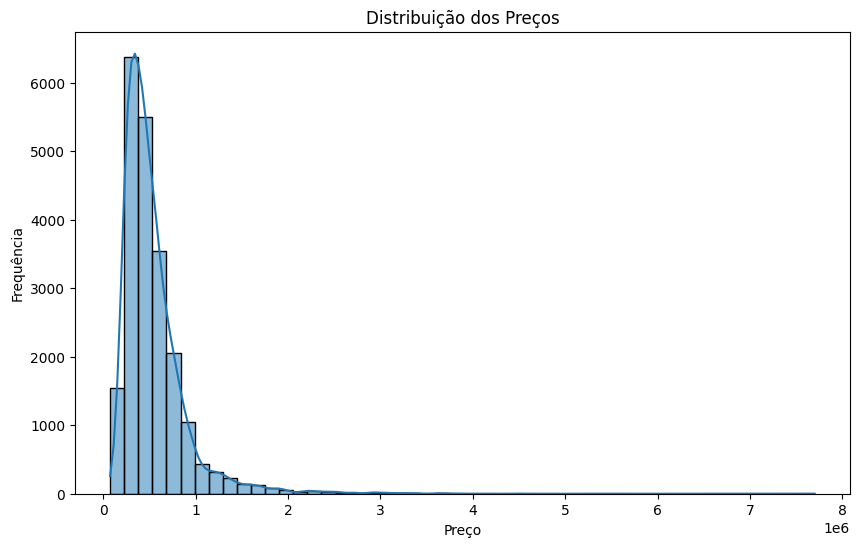

In [27]:
# Histograma
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribuição dos Preços')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.show()

Este gráfico mostra a distribuição dos preços das casas.

- O gráfico apresenta uma distribuição altamente assimétrica à direita, também conhecida como uma distribuição com cauda longa à direita. A maioria dos preços das casas está concentrada em um intervalo menor (mais próximo de zero) com uma diminuição gradual em direção à direita, onde estão os valores mais altos.

- A maioria das casas tem preços que se encontram em uma faixa mais baixa, principalmente abaixo de 1 milhão (1e6 no eixo x). Isso sugere que a maior parte das casas no conjunto de dados está em uma faixa de preço mais acessível.

- Outliers: A cauda longa à direita indica a presença de alguns valores extremos (outliers) nos preços das casas, que podem ser propriedades de luxo ou casas em áreas de alto valor. Esses outliers podem influenciar a média e o desvio padrão, o que é importante de se considerar no futuro ao construir modelos de machine learning.

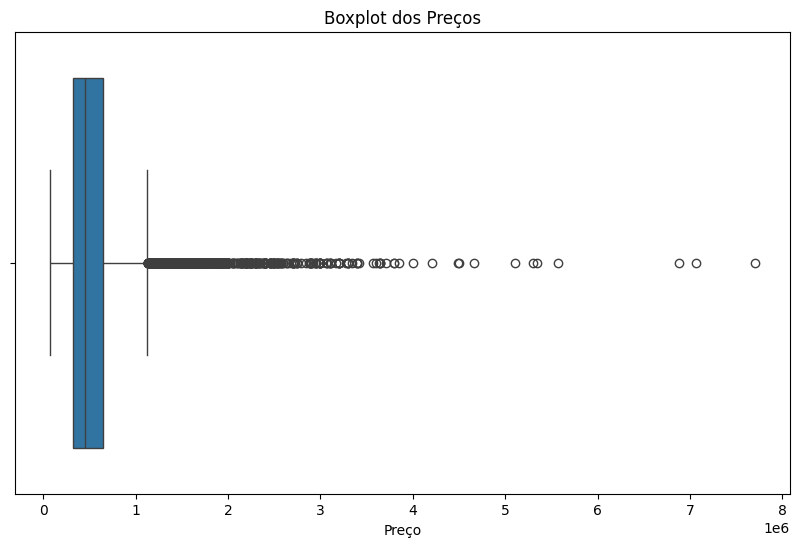

In [28]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Boxplot dos Preços')
plt.xlabel('Preço')
plt.show()

Este boxplot mostra a distribuição dos preços das casas e destaca a presença de muitos outliers.

- Caixa (Box): A caixa no meio representa o intervalo interquartil (IQR), que vai do primeiro quartil (Q1, 25%) ao terceiro quartil (Q3, 75%). A linha dentro da caixa é a mediana (o valor central). Isso mostra que a maioria dos preços das casas está concentrada em um intervalo relativamente estreito, próximo do lado esquerdo do gráfico.

- Linhas Verticais (Whiskers): As linhas que se estendem a partir da caixa indicam a amplitude dos dados que não são considerados outliers. Elas vão até o valor mínimo (Q1 - 1.5 * IQR) e o valor máximo (Q3 + 1.5 * IQR).

- Outliers (Pontos Fora da Caixa): Os círculos à direita da caixa representam os outliers. Neste caso, muitos outliers estão presentes, espalhados em um intervalo grande de preços, chegando a valores muito altos (até cerca de 8 milhões).

Próximos passos:
- Investigar os Outliers: Você pode investigar os outliers para ver se eles fazem sentido no contexto do seu problema (por exemplo, mansões, propriedades à beira-mar, etc.) ou se são erros nos dados.
- Tratar os Outliers: Se os outliers forem considerados ruído ou erros, você pode decidir removê-los ou transformá-los para análise e modelagem mais eficazes.

### Eliminando ruídos

Como vimos anteriormente, `bathrooms` possui valor mínimo de 0, o que é estranho, considerando que uma casa deve possuir um banheiro.

Provavelmente isso é alguma anomalia, portanto, podemos verificar quantos dados estão com 0 e remover da tabela.

In [29]:
zero_bathrooms_count = df[df['bathrooms'] == 0].shape[0]
print(f"Número de casas com 0 banheiros: {zero_bathrooms_count}")

Número de casas com 0 banheiros: 10


In [30]:
df = df[df['bathrooms'] != 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21603 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21603 non-null  int64  
 1   date           21603 non-null  object 
 2   price          21603 non-null  float64
 3   bedrooms       21603 non-null  int64  
 4   bathrooms      21603 non-null  float64
 5   sqft_living    21603 non-null  float64
 6   sqft_lot       21603 non-null  float64
 7   floors         21603 non-null  float64
 8   waterfront     21603 non-null  object 
 9   view           21603 non-null  object 
 10  condition      21603 non-null  object 
 11  grade          21603 non-null  object 
 12  sqft_above     21603 non-null  float64
 13  sqft_basement  21603 non-null  float64
 14  yr_built       21603 non-null  int64  
 15  yr_renovated   21603 non-null  float64
 16  zipcode        21603 non-null  object 
 17  lat            21603 non-null  float64
 18  long       

Além disso, também vemos `bedrooms` igual a 0. Casas residenciais devem ter pelo menos um quarto. Um número de quartos igual a 0 provavelmente indica um erro de entrada.

In [31]:
zero_bedrooms_count = df[df['bedrooms'] == 0].shape[0]
print(f"Número de casas com 0 quartos: {zero_bedrooms_count}")

Número de casas com 0 quartos: 6


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21603 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21603 non-null  int64  
 1   date           21603 non-null  object 
 2   price          21603 non-null  float64
 3   bedrooms       21603 non-null  int64  
 4   bathrooms      21603 non-null  float64
 5   sqft_living    21603 non-null  float64
 6   sqft_lot       21603 non-null  float64
 7   floors         21603 non-null  float64
 8   waterfront     21603 non-null  object 
 9   view           21603 non-null  object 
 10  condition      21603 non-null  object 
 11  grade          21603 non-null  object 
 12  sqft_above     21603 non-null  float64
 13  sqft_basement  21603 non-null  float64
 14  yr_built       21603 non-null  int64  
 15  yr_renovated   21603 non-null  float64
 16  zipcode        21603 non-null  object 
 17  lat            21603 non-null  float64
 18  long       

In [33]:
# Filtrando as casas com 0 quartos e mais de 1 andar
suspect_houses = df[(df['bedrooms'] == 0) & (df['floors'] > 1)]
suspect_houses

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,basement
3467,1453602309,20140805T000000,288000.0,0,1.5,1430.0,1650.0,3.0,0,0,...,0.0,1999,0.0,98125,47.7222,-122.290,1430.0,1650.0,0,0
8477,2569500210,20141117T000000,339950.0,0,2.5,2290.0,8319.0,2.0,0,0,...,0.0,1985,0.0,98042,47.3473,-122.151,2500.0,8751.0,0,0
8484,2310060040,20140925T000000,240000.0,0,2.5,1810.0,5669.0,2.0,0,0,...,0.0,2003,0.0,98038,47.3493,-122.053,1810.0,5685.0,0,0
12653,7849202299,20150218T000000,320000.0,0,2.5,1490.0,7111.0,2.0,0,0,...,0.0,1999,0.0,98065,47.5261,-121.826,1500.0,4675.0,0,0


In [34]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,basement
0,7129300520,20141013T000000,221900.0,3,1.00,1180.0,5650.0,1.0,0,0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340.0,5650.0,0,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570.0,7242.0,2.0,0,0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690.0,7639.0,1,1
2,5631500400,20150225T000000,180000.0,2,1.00,770.0,10000.0,1.0,0,0,...,0.0,1933,0.0,98028,47.7379,-122.233,2720.0,8062.0,0,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960.0,5000.0,1.0,0,0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360.0,5000.0,0,1
4,1954400510,20150218T000000,510000.0,3,2.00,1680.0,8080.0,1.0,0,0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800.0,7503.0,0,0


Considerando que tem mais de um andar, não faz sentido não ter quartos, já que é um conjunto residencial.

In [35]:
indices_para_remover = df[(df['bedrooms'] == 0) & (df['floors'] > 1)].index

df = df.drop(indices_para_remover)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21599 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21599 non-null  int64  
 1   date           21599 non-null  object 
 2   price          21599 non-null  float64
 3   bedrooms       21599 non-null  int64  
 4   bathrooms      21599 non-null  float64
 5   sqft_living    21599 non-null  float64
 6   sqft_lot       21599 non-null  float64
 7   floors         21599 non-null  float64
 8   waterfront     21599 non-null  object 
 9   view           21599 non-null  object 
 10  condition      21599 non-null  object 
 11  grade          21599 non-null  object 
 12  sqft_above     21599 non-null  float64
 13  sqft_basement  21599 non-null  float64
 14  yr_built       21599 non-null  int64  
 15  yr_renovated   21599 non-null  float64
 16  zipcode        21599 non-null  object 
 17  lat            21599 non-null  float64
 18  long       

In [36]:
# new_df = df[~((df['bedrooms'] == 0) & (df['floors'] > 1))]

# new_df.info()

Uma coisa que notei também é que a coluna bedrooms possui casas com até 33 quartos. Isso parece estranho. Vamos tentar entender o que está acontecendo!

In [37]:
#verificar dados com bedrooms maiores de 10
df[df['bedrooms'] > 10]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,basement
8757,1773100755,20140821T000000,520000.0,11,3.00,3000.0,4960.0,2.0,0,0,...,600.0,1918,1999.0,98106,47.5560,-122.363,1420.0,4960.0,1,1
15870,2402100895,20140625T000000,640000.0,33,1.75,1620.0,6000.0,1.0,0,0,...,580.0,1947,0.0,98103,47.6878,-122.331,1330.0,4700.0,0,1


Pela lógica nao faz sentido ter uma casa com 33 e 11 quartos e ter poucos banheiros.

Além disso, ter um sqft_living de 1620 pés quadrados, ter 33 quartos é praticamente impossível. Isso indica um erro nos dados, já que seria difícil acomodar tantos quartos em uma área tão pequena.

In [38]:
df = df[df['bedrooms'] < 10]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21594 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21594 non-null  int64  
 1   date           21594 non-null  object 
 2   price          21594 non-null  float64
 3   bedrooms       21594 non-null  int64  
 4   bathrooms      21594 non-null  float64
 5   sqft_living    21594 non-null  float64
 6   sqft_lot       21594 non-null  float64
 7   floors         21594 non-null  float64
 8   waterfront     21594 non-null  object 
 9   view           21594 non-null  object 
 10  condition      21594 non-null  object 
 11  grade          21594 non-null  object 
 12  sqft_above     21594 non-null  float64
 13  sqft_basement  21594 non-null  float64
 14  yr_built       21594 non-null  int64  
 15  yr_renovated   21594 non-null  float64
 16  zipcode        21594 non-null  object 
 17  lat            21594 non-null  float64
 18  long       

### Removendo variáveis redundantes

Isso inclui variáveis que não serão usadas. Isso vai depender do problema que você estiver tentando resolver.


In [39]:
df_limpo = df.copy().drop(['id', 'yr_built', 'yr_renovated'], axis=1)
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21594 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21594 non-null  object 
 1   price          21594 non-null  float64
 2   bedrooms       21594 non-null  int64  
 3   bathrooms      21594 non-null  float64
 4   sqft_living    21594 non-null  float64
 5   sqft_lot       21594 non-null  float64
 6   floors         21594 non-null  float64
 7   waterfront     21594 non-null  object 
 8   view           21594 non-null  object 
 9   condition      21594 non-null  object 
 10  grade          21594 non-null  object 
 11  sqft_above     21594 non-null  float64
 12  sqft_basement  21594 non-null  float64
 13  zipcode        21594 non-null  object 
 14  lat            21594 non-null  float64
 15  long           21594 non-null  float64
 16  sqft_living15  21594 non-null  float64
 17  sqft_lot15     21594 non-null  float64
 18  renovated  

In [40]:
# Removendo colunas que não fazem sentido para o problema
df_limpo = df_limpo.drop(['date', 'zipcode', 'lat', 'long'], axis=1)
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21594 entries, 0 to 21612
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21594 non-null  float64
 1   bedrooms       21594 non-null  int64  
 2   bathrooms      21594 non-null  float64
 3   sqft_living    21594 non-null  float64
 4   sqft_lot       21594 non-null  float64
 5   floors         21594 non-null  float64
 6   waterfront     21594 non-null  object 
 7   view           21594 non-null  object 
 8   condition      21594 non-null  object 
 9   grade          21594 non-null  object 
 10  sqft_above     21594 non-null  float64
 11  sqft_basement  21594 non-null  float64
 12  sqft_living15  21594 non-null  float64
 13  sqft_lot15     21594 non-null  float64
 14  renovated      21594 non-null  int64  
 15  basement       21594 non-null  int64  
dtypes: float64(9), int64(3), object(4)
memory usage: 2.8+ MB


### Análise multivariada

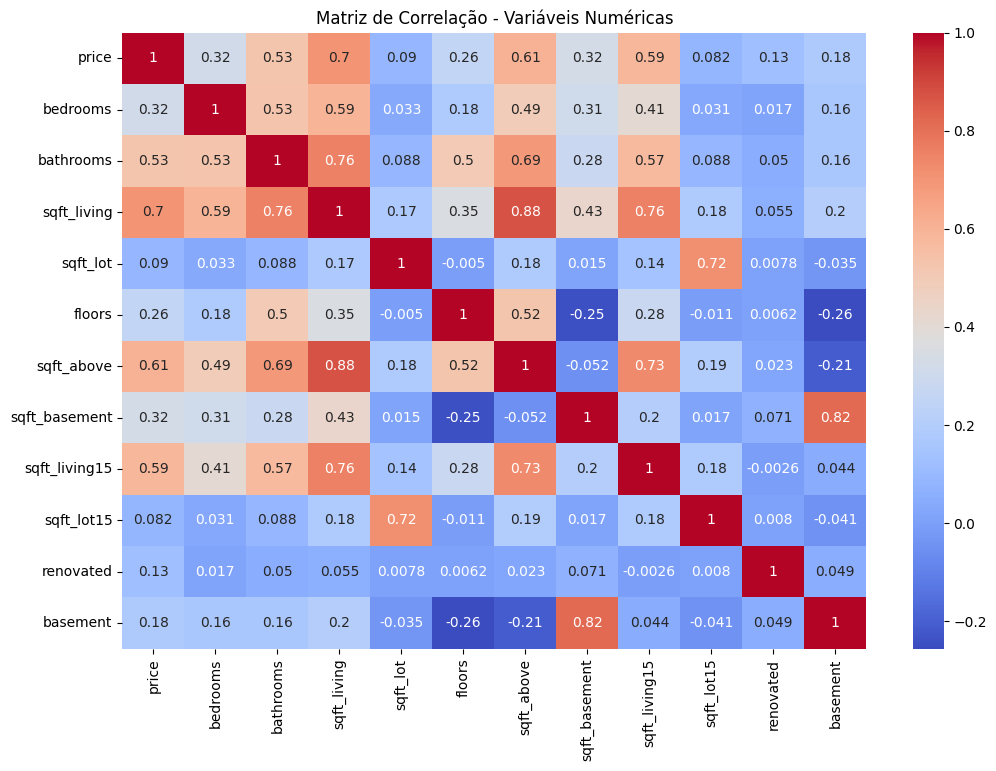

In [41]:
numeric_features = df_limpo.select_dtypes(include=['float64', 'int64'])

# Calcular a matriz de correlação
correlation_matrix = numeric_features.corr()

# Plotar a matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação - Variáveis Numéricas')
plt.show()


A matriz de correlação mostra o grau de relacionamento linear entre as variáveis numéricas do seu conjunto de dados. Os valores da matriz variam de -1 a 1:

- **1:** Correlação positiva perfeita. À medida que uma variável aumenta, a outra também aumenta.
- **-1:** Correlação negativa perfeita. À medida que uma variável aumenta, a outra diminui.
- **0:** Nenhuma correlação linear.

**Variáveis mais correlacionadas com o preço (`price`):**
   - `sqft_living` (0.70): Há uma forte correlação positiva, indicando que, quanto maior a área habitável, maior o preço.
   - `sqft_above` (0.61): A área acima do solo também se correlaciona positivamente com o preço.


**Correlação entre variáveis:**
   - Há uma forte correlação entre `sqft_living` e `sqft_above` (0.88). Isso faz sentido, pois a área acima do solo geralmente compõe a maior parte da área habitável.
   - `sqft_lot` e `sqft_lot15` também estão altamente correlacionadas (0.72), o que pode indicar redundância.
   - `sqft_basement` tem uma alta correlação com `basement` (0.82), o que significa que as duas variáveis fornecem informações semelhantes. Você pode considerar manter apenas uma delas.

Próximos passos:

1. **Remover variáveis altamente correlacionadas:** Variáveis com alta correlação entre si, como `sqft_living` e `sqft_above`, podem causar multicolinearidade em modelos de regressão.

In [42]:
df_limpo.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,renovated,basement
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,0,Média,7,1180.0,0.0,1340.0,5650.0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,0,Média,7,2170.0,400.0,1690.0,7639.0,1,1
2,180000.0,2,1.00,770.0,10000.0,1.0,0,0,Média,6,770.0,0.0,2720.0,8062.0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,0,Excelente,7,1050.0,910.0,1360.0,5000.0,0,1
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,0,Média,8,1680.0,0.0,1800.0,7503.0,0,0


In [43]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21594 entries, 0 to 21612
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21594 non-null  float64
 1   bedrooms       21594 non-null  int64  
 2   bathrooms      21594 non-null  float64
 3   sqft_living    21594 non-null  float64
 4   sqft_lot       21594 non-null  float64
 5   floors         21594 non-null  float64
 6   waterfront     21594 non-null  object 
 7   view           21594 non-null  object 
 8   condition      21594 non-null  object 
 9   grade          21594 non-null  object 
 10  sqft_above     21594 non-null  float64
 11  sqft_basement  21594 non-null  float64
 12  sqft_living15  21594 non-null  float64
 13  sqft_lot15     21594 non-null  float64
 14  renovated      21594 non-null  int64  
 15  basement       21594 non-null  int64  
dtypes: float64(9), int64(3), object(4)
memory usage: 3.3+ MB


## Colunas a remover

In [44]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21594 entries, 0 to 21612
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21594 non-null  float64
 1   bedrooms       21594 non-null  int64  
 2   bathrooms      21594 non-null  float64
 3   sqft_living    21594 non-null  float64
 4   sqft_lot       21594 non-null  float64
 5   floors         21594 non-null  float64
 6   waterfront     21594 non-null  object 
 7   view           21594 non-null  object 
 8   condition      21594 non-null  object 
 9   grade          21594 non-null  object 
 10  sqft_above     21594 non-null  float64
 11  sqft_basement  21594 non-null  float64
 12  sqft_living15  21594 non-null  float64
 13  sqft_lot15     21594 non-null  float64
 14  renovated      21594 non-null  int64  
 15  basement       21594 non-null  int64  
dtypes: float64(9), int64(3), object(4)
memory usage: 3.3+ MB


In [45]:
df_limpo = df_limpo.drop(['sqft_basement'], axis=1)
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21594 entries, 0 to 21612
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21594 non-null  float64
 1   bedrooms       21594 non-null  int64  
 2   bathrooms      21594 non-null  float64
 3   sqft_living    21594 non-null  float64
 4   sqft_lot       21594 non-null  float64
 5   floors         21594 non-null  float64
 6   waterfront     21594 non-null  object 
 7   view           21594 non-null  object 
 8   condition      21594 non-null  object 
 9   grade          21594 non-null  object 
 10  sqft_above     21594 non-null  float64
 11  sqft_living15  21594 non-null  float64
 12  sqft_lot15     21594 non-null  float64
 13  renovated      21594 non-null  int64  
 14  basement       21594 non-null  int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 3.1+ MB


### Removendo colunas com multicolinariedade

De acordo com o gráfico de multicolinearidade:
- `sqft_above`: Altamente correlacionada com `sqft_living`.
- `sqft_living15`: Altamente correlacionada com `sqft_living`. Escolha manter apenas uma das duas.
- `sqft_lot15`: Altamente correlacionada com `sqft_lot`.

In [46]:
df_limpo = df_limpo.drop(['sqft_above', 'sqft_living15', 'sqft_lot15'], axis=1)
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21594 entries, 0 to 21612
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21594 non-null  float64
 1   bedrooms     21594 non-null  int64  
 2   bathrooms    21594 non-null  float64
 3   sqft_living  21594 non-null  float64
 4   sqft_lot     21594 non-null  float64
 5   floors       21594 non-null  float64
 6   waterfront   21594 non-null  object 
 7   view         21594 non-null  object 
 8   condition    21594 non-null  object 
 9   grade        21594 non-null  object 
 10  renovated    21594 non-null  int64  
 11  basement     21594 non-null  int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 2.6+ MB


Multicolinearidade ocorre quando duas ou mais variáveis preditoras em um modelo de regressão estão altamente correlacionadas entre si. Isso significa que as variáveis fornecem informações semelhantes ao modelo.

- Problema: A multicolinearidade pode dificultar a determinação de quais variáveis realmente influenciam a variável alvo. Quando variáveis são altamente correlacionadas, pode ser difícil para o modelo identificar qual variável é a mais importante. Isso pode causar instabilidade nos coeficientes das variáveis preditoras, especialmente em modelos lineares como a regressão linear.
- Impacto: A presença de multicolinearidade pode inflar a variância dos coeficientes do modelo, tornando-o mais sensível a pequenas variações nos dados. Isso pode prejudicar a capacidade de generalização do modelo em novos dados.

### Convertendo variáveis categóricas

Precisamos converter modelos de ML pra variáveis numéricas já que dependem de operações matemáticas, e por isso precisam que as variáveis sejam numéricas.
- Dados categóricos em formato textual devem ser convertidos para números usando técnicas como **one-hot encoding**, **label encoding** ou **ordinal encoding** para permitir que os modelos aprendam a partir dessas informações.
- Converter variáveis categóricas em números ajuda a preservar a informação original e ajustá-la para a interpretação correta pelo modelo, evitando vieses por exemplo.

In [47]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21594 entries, 0 to 21612
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21594 non-null  float64
 1   bedrooms     21594 non-null  int64  
 2   bathrooms    21594 non-null  float64
 3   sqft_living  21594 non-null  float64
 4   sqft_lot     21594 non-null  float64
 5   floors       21594 non-null  float64
 6   waterfront   21594 non-null  object 
 7   view         21594 non-null  object 
 8   condition    21594 non-null  object 
 9   grade        21594 non-null  object 
 10  renovated    21594 non-null  int64  
 11  basement     21594 non-null  int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 2.6+ MB


In [48]:
df_limpo['waterfront'].unique()

array([0, 1], dtype=object)

In [49]:
df_limpo['view'].unique()

array([0, 3, 4, 2, 1], dtype=object)

As colunas que estão como objeto são `waterfront`, `view`, `condition`, `grade`. Mas sabemos que somente a coluna condition que está como texto, as outras já estão em formato numérico, só precisam ser convertidas pra numérico.

In [50]:
# Converter 'waterfront' para tipo numérico
df_limpo['waterfront'] = df_limpo['waterfront'].astype(int)

In [51]:
# Converter 'grade' para tipo numérico
df_limpo['grade'] = df_limpo['grade'].astype(int)

In [52]:
# Converter 'view' para tipo numérico
df_limpo['view'] = df_limpo['view'].astype(int)

In [53]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21594 entries, 0 to 21612
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21594 non-null  float64
 1   bedrooms     21594 non-null  int64  
 2   bathrooms    21594 non-null  float64
 3   sqft_living  21594 non-null  float64
 4   sqft_lot     21594 non-null  float64
 5   floors       21594 non-null  float64
 6   waterfront   21594 non-null  int64  
 7   view         21594 non-null  int64  
 8   condition    21594 non-null  object 
 9   grade        21594 non-null  int64  
 10  renovated    21594 non-null  int64  
 11  basement     21594 non-null  int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 2.6+ MB


In [54]:
df_limpo['condition'].unique()

array(['Média', 'Excelente', 'Boa', 'Ruim', 'Regular'], dtype=object)

In [55]:
# Definindo a ordem correta das categorias
ordem = ['Ruim', 'Média', 'Regular', 'Boa', 'Excelente']  # Sua ordem específica

# Criando o OrdinalEncoder com as categorias na ordem correta
ordinal_encoder = OrdinalEncoder(categories=[ordem])

# Aplicando o Ordinal Encoding na coluna 'condition'
df_limpo['condition_encoded'] = ordinal_encoder.fit_transform(df_limpo[['condition']])

# Exibir o resultado
print(df_limpo)

          price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      221900.0         3       1.00       1180.0    5650.0     1.0   
1      538000.0         3       2.25       2570.0    7242.0     2.0   
2      180000.0         2       1.00        770.0   10000.0     1.0   
3      604000.0         4       3.00       1960.0    5000.0     1.0   
4      510000.0         3       2.00       1680.0    8080.0     1.0   
...         ...       ...        ...          ...       ...     ...   
21608  360000.0         3       2.50       1530.0    1131.0     3.0   
21609  400000.0         4       2.50       2310.0    5813.0     2.0   
21610  402101.0         2       0.75       1020.0    1350.0     2.0   
21611  400000.0         3       2.50       1600.0    2388.0     2.0   
21612  325000.0         2       0.75       1020.0    1076.0     2.0   

       waterfront  view  condition  grade  renovated  basement  \
0               0     0      Média      7          0         0   
1              

In [56]:
data_teste = df_limpo.copy()

In [57]:
df_limpo.drop('condition', axis=1, inplace=True)

In [58]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21594 entries, 0 to 21612
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              21594 non-null  float64
 1   bedrooms           21594 non-null  int64  
 2   bathrooms          21594 non-null  float64
 3   sqft_living        21594 non-null  float64
 4   sqft_lot           21594 non-null  float64
 5   floors             21594 non-null  float64
 6   waterfront         21594 non-null  int64  
 7   view               21594 non-null  int64  
 8   grade              21594 non-null  int64  
 9   renovated          21594 non-null  int64  
 10  basement           21594 non-null  int64  
 11  condition_encoded  21594 non-null  float64
dtypes: float64(6), int64(6)
memory usage: 2.6 MB


# Modelos de regressão


## Regressão linear múltipla

In [59]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21594 entries, 0 to 21612
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              21594 non-null  float64
 1   bedrooms           21594 non-null  int64  
 2   bathrooms          21594 non-null  float64
 3   sqft_living        21594 non-null  float64
 4   sqft_lot           21594 non-null  float64
 5   floors             21594 non-null  float64
 6   waterfront         21594 non-null  int64  
 7   view               21594 non-null  int64  
 8   grade              21594 non-null  int64  
 9   renovated          21594 non-null  int64  
 10  basement           21594 non-null  int64  
 11  condition_encoded  21594 non-null  float64
dtypes: float64(6), int64(6)
memory usage: 2.6 MB


In [60]:
# Selecionando as variáveis independentes (features) e a dependente (alvo)
X = df_limpo[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
             'waterfront', 'view', 'grade', 'renovated', 'basement', 'condition_encoded']]

y = np.log(df['price'])  # Variável alvo (preço)

# Dividindo os dados em treino e teste (80% treino e 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [61]:
# Escalando os dados para normalização
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [62]:
# Criando e treinando o modelo de regressão linear
reg = LinearRegression()
reg.fit(X_train_scaled, y_train)

# Fazendo previsões no conjunto de teste
y_pred = reg.predict(X_test_scaled)

# Avaliando o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Exibindo o MSE e o R²
print(f'Mean Squared Error (MSE): {mse}')
print(f'Coeficiente de Determinação (R²): {r2}')

# Exibir as previsões juntamente com os dados reais
df_result = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
print(df_result.head())

Mean Squared Error (MSE): 0.10624128879930674
Coeficiente de Determinação (R²): 0.6192113036242078
       Actual Price  Predicted Price
3690      11.794338        12.500055
11823     12.945626        12.791130
4041      13.110291        12.813382
3440      12.779873        12.813369
19306     13.314635        12.813789


In [63]:
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f'MAPE: {mape:.2f}%')

MAPE: 2.02%


1. MSE (Mean Squared Error): mede o erro médio ao quadrafo entre os valores reais (y_test) e os valores previstos (y_pred).
  - 0.106 parece um valor razoável, especialmente que y foi transformado para logaritmo natural.

2. R² (Coeficiente de Determinação): mede a proporção da variância nos dados que é explicada pelo modelo. 1 indica que o modelo explica perfeitamente os dados. 0, o modelo não explica nada. E valores negativos são possíveis, mas indicam que o modelo pode estar ruim.
  - Com um valor de 0.619, o modelo explica 61.9% da variância nos dados, o que é um valor razoável, mas não é excelente.

3. MAPE (Mean Absolute Percentage Error): mede o erro médio absoluto percentual entre os valores reais (y_test) e os valores previstos (y_pred).
  - MAPE de 2.02% indica que, em média, o modelo erra as previsões em cerca de 2.02% do valor real.


### Com validação cruzada

In [64]:
# Selecionando as variáveis independentes (features) e a dependente (alvo)
X = data_teste[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
              'waterfront', 'view', 'grade', 'renovated','basement', 'condition_encoded']]
y = np.log(data_teste['price'])  # Variável alvo (preço)

# Escalando os dados para normalização
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)  # Escalando todo o dataset

# Criando o modelo de regressão linear
reg = LinearRegression()

# Definindo o número de folds para validação cruzada (ex: 5 folds)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Calculando o MSE e R² com validação cruzada
mse_scorer = make_scorer(mean_squared_error)
r2_scorer = make_scorer(r2_score)

mse_scores = cross_val_score(reg, X_scaled, y, cv=kf, scoring=mse_scorer)
r2_scores = cross_val_score(reg, X_scaled, y, cv=kf, scoring=r2_scorer)

# Exibindo a média e o desvio padrão das métricas de validação cruzada
print(f'MSE (validação cruzada): {mse_scores.mean()} ± {mse_scores.std()}')
print(f'R² (validação cruzada): {r2_scores.mean()} ± {r2_scores.std()}')

MSE (validação cruzada): 0.10914850729374133 ± 0.001790738435251045
R² (validação cruzada): 0.6058658351182908 ± 0.011561941877205054


### Com GridSearch

In [65]:
# Modelo base
ridge = Ridge()

# Grid de hiperparâmetros
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],  # Valores de regularização
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg']  # Diferentes solvers
}

# Configurando o Grid Search com validação cruzada
grid_search = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Usando MSE como métrica
    cv=5,  # 5-fold cross-validation
    verbose=1,
    n_jobs=-1  # Usar todos os núcleos disponíveis para acelerar
)

# Ajustando o Grid Search nos dados de treino
grid_search.fit(X_train_scaled, y_train)

# Resultados do Grid Search
print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor score (MSE negativo):", grid_search.best_score_)

# Melhor modelo encontrado
best_ridge = grid_search.best_estimator_

# Previsões com o conjunto de teste
y_pred = best_ridge.predict(X_test_scaled)

# Avaliação no conjunto de teste
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE no conjunto de teste: {rmse}")


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Melhores parâmetros: {'alpha': 0.1, 'solver': 'sparse_cg'}
Melhor score (MSE negativo): -0.10990137901240515
RMSE no conjunto de teste: 0.32594831193807233


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## XGBoost

In [66]:
# Configurando o modelo com hiperparâmetros iniciais
xgb_model = XGBRegressor(
    n_estimators=100,          # Número de árvores
    max_depth=5,               # Profundidade máxima das árvores
    learning_rate=0.1,         # Taxa de aprendizado
    subsample=0.8,             # Proporção dos dados usados em cada árvore
    colsample_bytree=0.8,      # Proporção de features usadas por árvore
    random_state=42,           # Para resultados reproduzíveis
    objective='reg:squarederror'  # Função de erro para regressão
)

# Treinando o modelo
xgb_model.fit(X_train_scaled, y_train)

# Fazendo previsões no conjunto de teste
y_pred = xgb_model.predict(X_test_scaled)


# Avaliando o modelo com diferentes métricas
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
mse = mean_squared_error(y_test, y_pred)                 # MSE
mae = mean_absolute_error(y_test, y_pred)               # MAE
r2 = r2_score(y_test, y_pred)                           # R²
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # MAPE

# Exibindo as métricas
print(f"RMSE (Root Mean Squared Error): {rmse}")
print(f"MSE (Mean Squared Error): {mse}")
print(f"MAE (Mean Absolute Error): {mae}")
print(f"R² (Coeficiente de Determinação): {r2}")
print(f"MAPE (Mean Absolute Percentage Error): {mape:.2f}%")

RMSE (Root Mean Squared Error): 0.3022635608949869
MSE (Mean Squared Error): 0.09136326024491745
MAE (Mean Absolute Error): 0.2393445849780974
R² (Coeficiente de Determinação): 0.672536947184216
MAPE (Mean Absolute Percentage Error): 1.84%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


1. RMSE (Root Mean Squared Error): o modelo tem um erro médio em torno de 0.302 na escala da variável alvo. Valores menores são melhores, indicando que as previsões estão mais próximas dos valores reais.

2. MSE (Mean Squared Error): O MSE é o erro médio ao quadrado, sendo mais sensível a grandes desvios (outliers).

3. MAE (Mean Absolute Error): O MAE representa o erro médio absoluto sem penalizar mais erros grandes como o RMSE faz.
Isso indica que, em média, o modelo está errando 0.239 em unidades da variável alvo.

4. R² (Coeficiente de Determinação): O R² mede a proporção da variância explicada pelo modelo. Com 67.2%, o modelo consegue explicar uma boa parte da variância dos dados, mas há espaço para melhorias.

5. MAPE (Mean Absolute Percentage Error): indica que, em média, o modelo erra 1.84% em relação aos valores reais.

### Feature importance

In [ ]:
# Certifique-se de que X_train é um DataFrame com colunas nomeadas
feature_names = X_train.columns.tolist()

# Atualizando os nomes das features no modelo XGBoost
xgb_model.get_booster().feature_names = feature_names


<Figure size 1000x800 with 0 Axes>

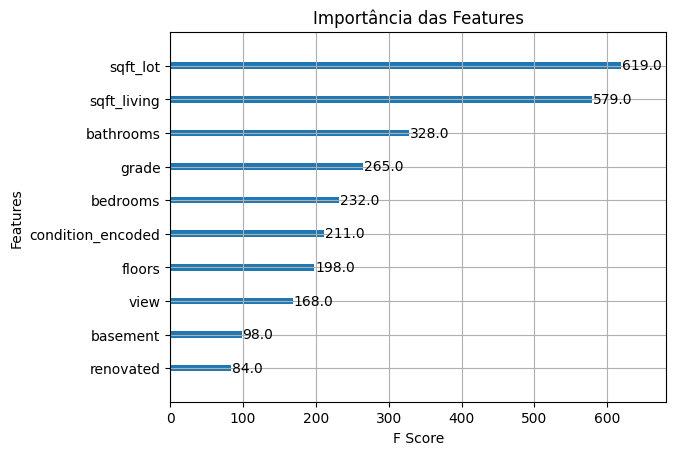

In [ ]:
# Plotar a importância das features
plt.figure(figsize=(10, 8))
plot_importance(xgb_model, max_num_features=10, importance_type='weight', xlabel='F Score')
plt.title('Importância das Features')
plt.show()

### Usando GridSearchCV

In [ ]:
# Modelo base
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# Definindo o grid de hiperparâmetros
param_grid = {
    'n_estimators': [100, 200, 300],        # Número de árvores
    'max_depth': [3, 5, 7],                # Profundidade máxima
    'learning_rate': [0.01, 0.1, 0.2],     # Taxa de aprendizado
    'subsample': [0.8, 1.0],               # Proporção dos dados usada em cada árvore
    'colsample_bytree': [0.8, 1.0],        # Proporção de features usadas por árvore
    'reg_alpha': [0, 0.1, 1],              # Regularização L1
    'reg_lambda': [1, 10],                 # Regularização L2
}

# Configurando o GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,                  # Modelo a ser ajustado
    param_grid=param_grid,          # Grid de hiperparâmetros
    scoring='neg_mean_squared_error',  # Métrica de avaliação
    cv=5,                           # Validação cruzada (5-fold)
    verbose=1,                      # Exibe progresso
    n_jobs=-1                       # Paralelismo para acelerar
)

# Ajustando o Grid Search nos dados escalados
grid_search.fit(X_train_scaled, y_train)

# Melhor combinação de hiperparâmetros
print("Melhores parâmetros:", grid_search.best_params_)

# Melhor score na validação cruzada
print("Melhor score (MSE negativo):", grid_search.best_score_)

# Avaliação do modelo com os melhores hiperparâmetros no conjunto de teste
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE no conjunto de teste:", rmse)


Fitting 5 folds for each of 648 candidates, totalling 3240 fits


KeyboardInterrupt: 

## Usando Pycaret

In [ ]:
pip install pycaret

In [ ]:
from pycaret.regression import *

# Configurar o PyCaret para classificação (substitua 'coluna_alvo' pelo nome da sua coluna alvo)
clf_setup = setup(df_limpo, target='price', preprocess=True)

TypeError: ufunc 'log' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,128970.3229,41862769905.4369,204176.1048,0.6863,0.3098,0.2648,1.0590
gbr,Gradient Boosting Regressor,130532.3172,41508374547.8690,203316.6502,0.6862,0.3151,0.2715,1.7770
rf,Random Forest Regressor,131782.2991,41801955660.6717,204271.3439,0.6836,0.3184,0.2703,6.2380
xgboost,Extreme Gradient Boosting,131591.5945,43657535897.6000,208418.4562,0.6725,0.3155,0.2680,0.1880
et,Extra Trees Regressor,137916.0803,46831718297.5865,215991.0144,0.6477,0.3363,0.2817,4.9990
lar,Least Angle Regression,149397.5578,51597025280.0000,226887.5641,0.6115,0.4146,0.3123,0.1000
br,Bayesian Ridge,149396.8047,51598911488.0000,226891.8375,0.6115,0.4120,0.3123,0.0510
llar,Lasso Least Angle Regression,149396.7938,51597033472.0000,226887.5562,0.6115,0.4147,0.3123,0.0690
ridge,Ridge Regression,149397.4453,51596981862.4000,226887.5812,0.6115,0.4136,0.3123,0.0580
lasso,Lasso Regression,149396.8047,51597036339.2000,226887.5625,0.6115,0.4147,0.3123,0.1400


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
# Criar o modelo base (Ex.: Random Forest)
rf_model = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,136070.0570,55308909255.6235,235178.4626,0.5849,0.3115,0.2662
1,125877.3712,34906763242.2800,186833.5174,0.6859,0.3151,0.2699
2,126760.6776,35091013793.6617,187325.9560,0.6695,0.3197,0.2738
3,130670.2954,40867489451.2359,202157.0910,0.6919,0.3219,0.2742
4,131330.5291,40903413153.5209,202245.9225,0.7210,0.3117,0.2694
5,129619.2101,37551875059.1641,193783.0618,0.7360,0.3102,0.2644
6,129706.2373,41489024399.8191,203688.5475,0.6902,0.3104,0.2675
7,129889.6927,41381083903.0713,203423.4104,0.7497,0.3196,0.2787
8,131209.3617,43638307621.7989,208897.8402,0.6258,0.3244,0.2861


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# Ajustar hiperparâmetros com Grid Search
tuned_rf_model = tune_model(rf_model)

# Ver os parâmetros ajustados
print(tuned_rf_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,135210.9048,52760490535.0412,229696.5183,0.6040,0.3104,0.2660
1,126850.1751,35016309466.3052,187126.4531,0.6849,0.3164,0.2716
2,127556.1294,35031557199.0990,187167.1905,0.6701,0.3208,0.2764
3,130865.9091,41284879680.8480,203186.8098,0.6887,0.3219,0.2743
4,131482.3265,40090240815.6292,200225.4749,0.7266,0.3126,0.2708
5,130931.2025,38896654670.5303,197222.3483,0.7265,0.3128,0.2672
6,130930.0270,43950009749.1940,209642.5762,0.6719,0.3120,0.2693
7,129565.3745,39704918409.2994,199260.9305,0.7598,0.3195,0.2791
8,131680.3663,45826942305.0343,214072.2829,0.6071,0.3256,0.2888


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
GradientBoostingRegressor(random_state=1508)


## GBR Model

In [67]:
# Configurando o modelo com hiperparâmetros iniciais
gbr_model = GradientBoostingRegressor(
    n_estimators=100,          # Número de árvores
    max_depth=5,               # Profundidade máxima das árvores
    learning_rate=0.1,         # Taxa de aprendizado
    subsample=0.8,             # Proporção dos dados usados em cada árvore
    random_state=42            # Para resultados reproduzíveis
)

# Treinando o modelo
gbr_model.fit(X_train_scaled, y_train)

# Fazendo previsões no conjunto de teste
y_pred = gbr_model.predict(X_test_scaled)

# Avaliando o modelo com diferentes métricas
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
mse = mean_squared_error(y_test, y_pred)                 # MSE
mae = mean_absolute_error(y_test, y_pred)               # MAE
r2 = r2_score(y_test, y_pred)                           # R²
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # MAPE

# Exibindo as métricas
print(f"RMSE (Root Mean Squared Error): {rmse}")
print(f"MSE (Mean Squared Error): {mse}")
print(f"MAE (Mean Absolute Error): {mae}")
print(f"R² (Coeficiente de Determinação): {r2}")
print(f"MAPE (Mean Absolute Percentage Error): {mape:.2f}%")


RMSE (Root Mean Squared Error): 0.30342591231035027
MSE (Mean Squared Error): 0.09206728426136838
MAE (Mean Absolute Error): 0.2406583879368859
R² (Coeficiente de Determinação): 0.6700135931241196
MAPE (Mean Absolute Percentage Error): 1.85%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Com Gridsearch

In [ ]:
# Modelo base para Gradient Boosting
gbr = GradientBoostingRegressor(random_state=42)

# Definindo o grid de hiperparâmetros
param_grid_gbr = {
    'n_estimators': [100, 200, 300],        # Número de árvores
    'max_depth': [3, 5, 7],                # Profundidade máxima
    'learning_rate': [0.01, 0.1, 0.2],     # Taxa de aprendizado
    'subsample': [0.8, 1.0],               # Proporção dos dados usada em cada árvore
    'min_samples_split': [2, 5, 10],       # Número mínimo de amostras para dividir um nó
    'min_samples_leaf': [1, 2, 4],         # Número mínimo de amostras em uma folha
}

# Configurando o GridSearchCV
grid_search_gbr = GridSearchCV(
    estimator=gbr,                  # Modelo a ser ajustado
    param_grid=param_grid_gbr,      # Grid de hiperparâmetros
    scoring='neg_mean_squared_error',  # Métrica de avaliação
    cv=5,                           # Validação cruzada (5-fold)
    verbose=1,                      # Exibe progresso
    n_jobs=-1                       # Paralelismo para acelerar
)

# Ajustando o Grid Search nos dados escalados
grid_search_gbr.fit(X_train_scaled, y_train)

# Melhor combinação de hiperparâmetros
print("Melhores parâmetros:", grid_search_gbr.best_params_)

# Melhor score na validação cruzada
print("Melhor score (MSE negativo):", grid_search_gbr.best_score_)

# Avaliação do modelo com os melhores hiperparâmetros no conjunto de teste
best_gbr = grid_search_gbr.best_estimator_
y_pred_gbr = best_gbr.predict(X_test_scaled)

# Calculando métricas
rmse = mean_squared_error(y_test, y_pred_gbr, squared=False)  # RMSE
mae = mean_absolute_error(y_test, y_pred_gbr)                # MAE
mape = np.mean(np.abs((y_test - y_pred_gbr) / y_test)) * 100  # MAPE
r2 = r2_score(y_test, y_pred_gbr)                            # R²

# Exibindo métricas
print(f"RMSE no conjunto de teste: {rmse:.4f}")
print(f"MAE no conjunto de teste: {mae:.4f}")
print(f"MAPE no conjunto de teste: {mape:.2f}%")
print(f"R² no conjunto de teste: {r2:.4f}")

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Melhores parâmetros: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.8}
Melhor score (MSE negativo): -0.09386376721013893
RMSE no conjunto de teste: 0.3032
MAE no conjunto de teste: 0.2403
MAPE no conjunto de teste: 1.85%
R² no conjunto de teste: 0.6706


# Salvando modelos (serialização)

In [68]:
pip install joblib

In [69]:
from joblib import dump

# - xgb_model: o modelo treinado
# - scaler: o normalizador usado em X (ex.: MinMaxScaler)
# - np.log aplicado em y_train durante o treinamento

# Criar um dicionário com o modelo e as transformações
pipeline = {
    'model': gbr_model,      # O modelo treinado
    'scaler': scaler,        # O normalizador de X
    'y_transform': 'log',    # Informação sobre a transformação de y
}

# Serializar o pipeline para um arquivo
dump(pipeline, 'model_pipeline.joblib')
print("Modelo e pipeline serializados com sucesso!")


Modelo e pipeline serializados com sucesso!


## Parte pra levar pro streamlit

In [70]:
# from joblib import load

# # Carregar o pipeline salvo
# pipeline = load('model_pipeline.joblib')

# # Acessar os objetos do pipeline
# model = pipeline['model']       # O modelo treinado
# scaler = pipeline['scaler']     # O normalizador usado em X
# y_transform = pipeline['y_transform']  # Informação sobre a transformação de y

# print("Pipeline carregado com sucesso!")


Pipeline carregado com sucesso!


In [72]:
# # Fazendo novas previsões - interface do streamlit

# # Novos dados para previsão (substitua pelos valores do imóvel a ser avaliado)
# X_new = np.array([[
#     3,         # bedrooms: Número de quartos
#     2,         # bathrooms: Número de banheiros
#     1500,      # sqft_living: Área útil em pés²
#     5000,      # sqft_lot: Área do lote em pés²
#     1,         # floors: Número de andares
#     0,         # waterfront: Vista para a água (0 = não, 1 = sim)
#     2,         # view: Avaliação da vista (0 a 4)
#     7,         # grade: Classificação da qualidade (1 a 12)
#     1,         # renovated: 1 = reformado, 0 = não reformado
#     300,       # basement: Tamanho do porão em pés²
#     4          # condition_encoded: Condição geral (1 = ruim, 5 = excelente)
# ]])


# # Aplicar a normalização em X
# X_new_scaled = scaler.transform(X_new)

# # Fazer a previsão
# y_pred_log = model.predict(X_new_scaled)  # O modelo retorna o log(y)

# # Reverter a transformação log para a escala original
# if y_transform == 'log':
#     y_pred = np.exp(y_pred_log)  # Reverter log para a escala original

# print(f"Previsão (escala original): {y_pred}")


Previsão (escala original): [548744.99733968]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
